In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-merged-data/app_train_merge_bureau.csv
/kaggle/input/final-merged-data/final_merged_table.csv


In [2]:
final = pd.read_csv("../input/final-merged-data/final_merged_table.csv")

# SELECT CATEGORICAL FEATURES

In [3]:
from sklearn.preprocessing import OrdinalEncoder
def prepare_categorical(x):
    oe = OrdinalEncoder()
    oe.fit(x)
    x_new = oe.transform(x)
    return x_new

In [4]:
cat = final.select_dtypes(include = object)
encoded = prepare_categorical(final[cat.columns])
for i in range(len(cat.columns)):
    cat[cat.columns[i]] = encoded[: ,i]
cat.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,6.0,5.0,2.0,0.0,5.0,0.0
1,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,39.0,2.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,1.0,11.0,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,1.0,6.0,7.0,4.0,0.0,1.0,8.0,6.0,5.0,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,3.0,4.0,37.0,NaN,NaN,NaN,NaN


In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
target = final["TARGET"]
features = cat.fillna(cat.max() + 1, downcast='infer')
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(features, target)
list(features.columns[selector.get_support()])

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [6]:
pd.Series(index = features.columns, data = selector.pvalues_).sort_values(ascending = True)

ORGANIZATION_TYPE              0.000000e+00
NAME_INCOME_TYPE              2.537261e-205
HOUSETYPE_MODE                5.156737e-161
CODE_GENDER                   9.985791e-134
EMERGENCYSTATE_MODE           4.938018e-124
NAME_EDUCATION_TYPE           7.245723e-108
OCCUPATION_TYPE                8.122390e-84
NAME_CONTRACT_TYPE             1.038579e-59
NAME_HOUSING_TYPE              1.018930e-57
WALLSMATERIAL_MODE             2.106698e-48
FLAG_OWN_CAR                   7.333211e-23
FONDKAPREMONT_MODE             9.113068e-17
NAME_TYPE_SUITE                5.066973e-04
WEEKDAY_APPR_PROCESS_START     6.662880e-03
NAME_FAMILY_STATUS             2.747156e-02
FLAG_OWN_REALTY                5.915303e-02
dtype: float64

<AxesSubplot:>

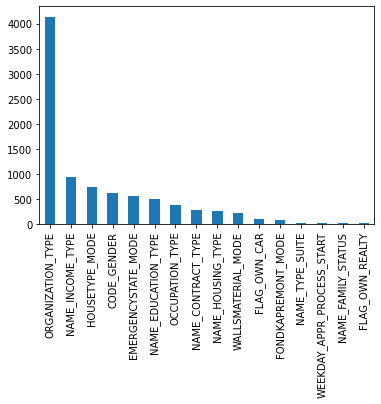

In [7]:
pd.Series(index = features.columns, data = selector.scores_).sort_values(ascending = False)[0:20].plot(kind = "bar")

# SELECTING NUMERIC FEATURES

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

numeric = final.select_dtypes(include = np.number).drop(["Unnamed: 0", "SK_ID_CURR", "TARGET", "SK_ID_PREV", "DEBT_OVER_CREDIT", "SK_DPD_mean_pos", "SK_DPD_DEF_mean_pos"], axis = 1)
target = final["TARGET"]
features = numeric.fillna(numeric.mean(), downcast='infer').round(3)

selector = SelectKBest(score_func=f_classif, k=30)
selector.fit(features, target)
selected = list(features.columns[selector.get_support()])
selected

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [79] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_WORK_PHONE',
 'REGION_RATING_CLIENT',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_CREDIT_UPDATE',
 'log_AMT_CREDIT_prev',
 'log_AMT_DOWN_PAYMENT_prev',
 'HOUR_APPR_PROCESS_START_prev',
 'RATE_DOWN_PAYMENT_prev',
 'DAYS_DECISION_prev',
 'CNT_PAYMENT_prev',
 'DAYS_FIRST_DUE_prev',
 'DAYS_TERMINATION_prev']

In [9]:
scores = selector.scores_

In [10]:
scores

array([1.13249930e+02, 4.87571051e+00, 2.83875387e+02, 5.05208606e+01,
       4.28093978e+02, 1.89397609e+03, 6.22071742e+02, 5.42753029e+02,
       8.16396507e+02, 1.34008685e+02, 8.78325664e-02, 2.50404428e+02,
       4.21268394e-02, 1.74376046e+02, 9.50793797e-01, 2.66432852e+01,
       1.07049125e+03, 1.79686319e+02, 9.56110796e+00, 1.48195976e+01,
       2.44455081e+00, 6.07281571e+02, 8.01742167e+02, 3.25517304e+02,
       3.05386216e+03, 8.11017452e+03, 7.81066362e+03, 1.16365002e+02,
       5.83709410e+01, 1.27711388e+01, 4.43452996e+01, 2.69278316e+01,
       1.45281037e+02, 4.80787137e+01, 2.62714877e+02, 9.65474602e+01,
       1.33863401e+01, 7.44573961e-01, 2.27656901e+01, 2.55977889e+01,
       3.19606416e+02, 3.00620075e+02, 9.40487178e+02, 9.02425546e+00,
       6.05938369e+02, 2.19563705e+00, 3.06633789e-02, 2.51769341e+02,
       7.10006049e-01, 1.98810602e+01, 5.82539493e+00, 6.14739226e-01,
       5.50063441e+00, 1.75636672e-01, 4.12643388e+01, 2.75441802e+01,
      

<AxesSubplot:>

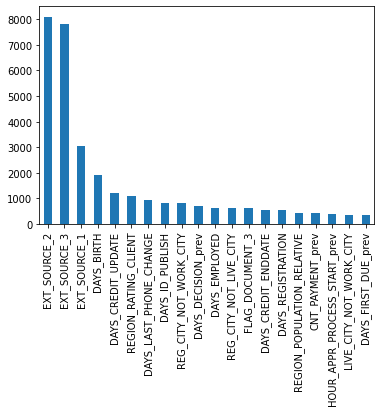

In [11]:
pd.Series(index = features.columns, data = selector.scores_).sort_values(ascending = False)[0:20].plot(kind = "bar")